Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

import numpy as np
from numpy import random

# melhorar a visualização
%matplotlib inline
mpl.style.use('ggplot')
plt.style.use('fivethirtyeight')
sns.set(context='notebook', palette='dark', color_codes=True)

#Modelos
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix


# métricas de avaliação
from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix, auc, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

# Reamostragem dos dados
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler

# outras
import time
import pickle
import warnings
from scipy import interpolate
from pprint import pprint
from scipy.stats import norm
from collections import Counter
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

# melhorar a visualização
%matplotlib inline
mpl.style.use('ggplot')
plt.style.use('fivethirtyeight')
sns.set(context='notebook', palette='dark', color_codes=True)

# mesagens de warning
warnings.filterwarnings("ignore")

carregando o dataset

In [ ]:
dados = pd.read_csv('https://raw.githubusercontent.com/letpires/7DaysOfCodeSpotifyML/main/dataset.csv')

In [ ]:
dados.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [ ]:
dados.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [ ]:
dados.shape

(114000, 21)

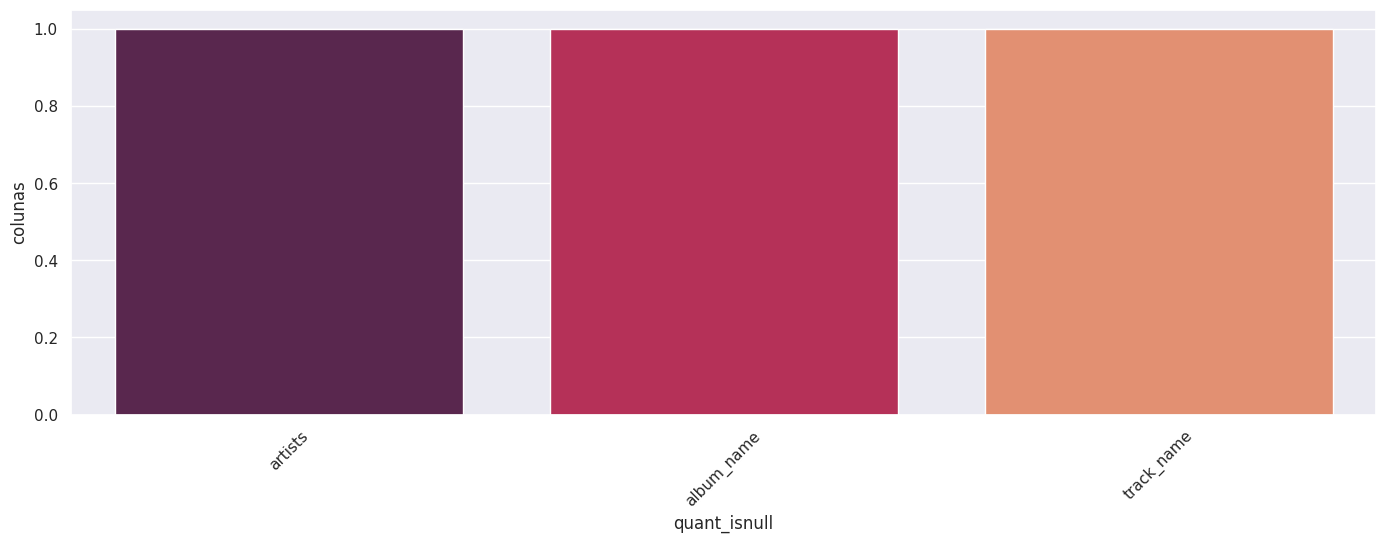

In [ ]:
#função que gera uma gráfico de barras com colunas e frequência dos dados faltantes.
def missing_visualization(df):
  quant_isnull = df.isnull().sum()
  columns = df.columns
  dic = {"colunas":[],"quant_isnull":[]}
  for coluna,quant in zip(columns,quant_isnull):
    if quant > 0:
      dic["colunas"].append(quant)
      dic["quant_isnull"].append(coluna)
  df = pd.DataFrame(dic)
  plt.figure(figsize=(15,5))
  sns.barplot(x=df["quant_isnull"],y=df["colunas"],data=df, palette="rocket")
  plt.xticks(rotation=45);


missing_visualization(dados)

Localizando as 100 músicas mais populares

In [ ]:
as_mais_populares = dados.sort_values(['popularity'], ascending=False).head(100)

In [ ]:
as_mais_populares

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,...,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,4,dance
81051,81051,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,...,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,4,pop
51664,51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,...,-5.548,1,0.0440,0.01250,0.033000,0.2300,0.550,128.033,4,hip-hop
81210,81210,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,...,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4,pop
89411,89411,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,...,-5.329,0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,4,reggaeton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68553,68553,4tYFy8ALRjIZvnvSLw5lxN,Bad Bunny;Rauw Alejandro,Un Verano Sin Ti,Party,90,227628,False,0.829,0.799,...,-5.389,1,0.0897,0.01510,0.000543,0.2420,0.471,97.013,4,latino
68673,68673,1797zYiX4cKosMH836X9Gt,Bad Bunny;Tony Dize,Un Verano Sin Ti,La Corriente,90,198367,True,0.663,0.786,...,-3.510,0,0.1950,0.22900,0.000000,0.2190,0.579,196.120,4,latino
79001,79001,75FEaRjZTKLhTrFGsfMUXR,Kate Bush,Hounds Of Love,Running Up That Hill (A Deal With God),90,298933,False,0.629,0.547,...,-13.123,0,0.0550,0.72000,0.003140,0.0604,0.197,108.375,4,piano
20014,20014,7ef4DlsgrMEH11cDZd32M6,Calvin Harris;Dua Lipa,One Kiss (with Dua Lipa),One Kiss (with Dua Lipa),89,214846,False,0.791,0.862,...,-3.240,0,0.1100,0.03700,0.000022,0.0814,0.592,123.994,4,dance


In [ ]:
dados.track_genre.unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [ ]:
dados.query("track_genre == 'dance'").sort_values(['popularity'] , ascending=False).head(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,...,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,4,dance
20008,20008,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,...,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4,dance
20000,20000,5IgjP7X4th6nMNDh4akUHb,Chris Brown,Indigo (Extended),Under The Influence,96,184613,True,0.733,0.690,...,-5.529,0,0.0427,0.06350,0.000001,0.1050,0.310,116.992,4,dance
20850,20850,1xzi1Jcr7mEi9K2RfzLOqS,Beyoncé,RENAISSANCE,CUFF IT,93,225388,True,0.780,0.689,...,-5.668,1,0.1410,0.03680,0.000010,0.0698,0.642,115.042,4,dance
20017,20017,0mBP9X2gPCuapvpZ7TGDk3,Charlie Puth;Jung Kook;BTS,Left and Right (Feat. Jung Kook of BTS),Left and Right (Feat. Jung Kook of BTS),92,154486,False,0.881,0.592,...,-4.898,1,0.0324,0.61900,0.000013,0.0901,0.719,101.058,4,dance


Consultando as top musicas de cada gênero

In [ ]:
resultados = []
for genero in dados.track_genre.unique():
  top_musica = dados.query('track_genre == @genero').sort_values(['popularity'], ascending= False).head(1)
  resultados.append(top_musica)

resultado_final = pd.concat(resultados)
resultado_final.head(5)


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.443,...,-9.681,1,0.0526,0.4690,0.0000,0.0829,0.167,119.949,4,acoustic
1100,1100,1q8NdCAQ9QUjpYiqzdd3mv,Calle 13,Calle 13 (Explicit Version),Atrévete-Te-Te,75,239306,True,0.829,0.878,...,-5.951,1,0.1010,0.0959,0.0000,0.7760,0.883,87.991,4,afrobeat
2003,2003,2QjOHCTQ1Jl3zawyYOpxh6,The Neighbourhood,I Love You.,Sweater Weather,93,240400,False,0.612,0.807,...,-2.810,1,0.0336,0.0495,0.0177,0.1010,0.398,124.053,4,alt-rock
3003,3003,2QjOHCTQ1Jl3zawyYOpxh6,The Neighbourhood,I Love You.,Sweater Weather,93,240400,False,0.612,0.807,...,-2.810,1,0.0336,0.0495,0.0177,0.1010,0.398,124.053,4,alternative
4002,4002,0yc6Gst2xkRu0eMLeRMGCX,Cigarettes After Sex,Cigarettes After Sex,Apocalypse,84,290616,False,0.370,0.467,...,-9.013,1,0.0273,0.0205,0.5720,0.1090,0.182,94.485,4,ambient


Outra forma de fazer essa consulta

In [ ]:
mais_popular_por_genero = dados.loc[dados.groupby('track_genre')['popularity'].idxmax()]
mais_popular_por_genero.head(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.443,...,-9.681,1,0.0526,0.4690,0.0000,0.0829,0.167,119.949,4,acoustic
1100,1100,1q8NdCAQ9QUjpYiqzdd3mv,Calle 13,Calle 13 (Explicit Version),Atrévete-Te-Te,75,239306,True,0.829,0.878,...,-5.951,1,0.1010,0.0959,0.0000,0.7760,0.883,87.991,4,afrobeat
2003,2003,2QjOHCTQ1Jl3zawyYOpxh6,The Neighbourhood,I Love You.,Sweater Weather,93,240400,False,0.612,0.807,...,-2.810,1,0.0336,0.0495,0.0177,0.1010,0.398,124.053,4,alt-rock
3003,3003,2QjOHCTQ1Jl3zawyYOpxh6,The Neighbourhood,I Love You.,Sweater Weather,93,240400,False,0.612,0.807,...,-2.810,1,0.0336,0.0495,0.0177,0.1010,0.398,124.053,4,alternative
4002,4002,0yc6Gst2xkRu0eMLeRMGCX,Cigarettes After Sex,Cigarettes After Sex,Apocalypse,84,290616,False,0.370,0.467,...,-9.013,1,0.0273,0.0205,0.5720,0.1090,0.182,94.485,4,ambient


Selecionando os artistas mais populares = popularidade * Número de músicas

In [ ]:
artistas_mais_populares = dados.groupby('artists')['popularity'].sum().sort_values(ascending=False)
artistas_mais_populares


,popularity
artists,
The Beatles,17021
Linkin Park,12560
BTS,10358
Prateek Kuhad,10054
Elvis Presley,9307
...,...
Wiz Khalifa,0
Witness the Existence,0
Sharapov;Alexandrjfk,0


In [ ]:
artistas_mais_populares

,popularity
artists,
The Beatles,17021
Linkin Park,12560
BTS,10358
Prateek Kuhad,10054
Elvis Presley,9307
...,...
Wiz Khalifa,0
Witness the Existence,0
Sharapov;Alexandrjfk,0


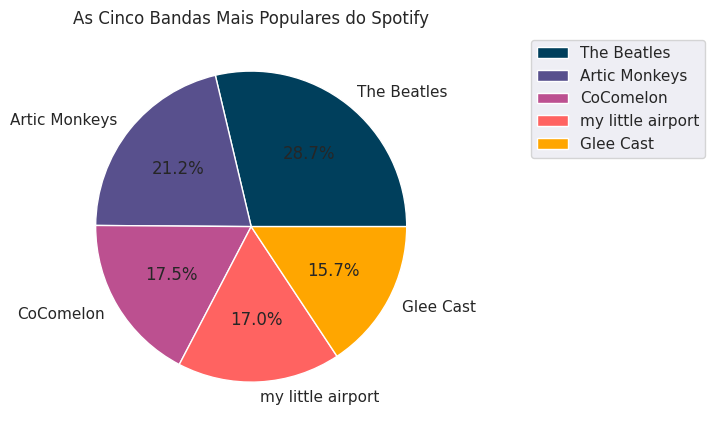

In [ ]:
plt.pie(artistas_mais_populares.head(5), labels = ['The Beatles', 'Artic Monkeys', 'CoComelon', 'my little airport', 'Glee Cast'], autopct='%1.1f%%',
colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600'])
plt.legend(loc='upper left', bbox_to_anchor=(1.2, 1))
plt.title('As Cinco Bandas Mais Populares do Spotify')
plt.show()

Conferindo a existência de Dados Duplicados

In [ ]:
duplicados = dados.duplicated(subset=['track_id'])
print("Dados duplicados: ", duplicados.sum())

Dados duplicados:  24259


Removendo Dados Duplicados

In [ ]:
dados_limpos = dados.drop_duplicates(subset=['track_id'])

Verificando dados nulos

In [ ]:
# Porcentagem de dados nulos por coluna
porcentagem_nulos_por_coluna = dados_limpos.isnull().mean() * 100
print("Porcentagem de dados nulos por coluna:")
print(porcentagem_nulos_por_coluna)

# Sem dados nulos

Porcentagem de dados nulos por coluna:
Unnamed: 0          0.000000
track_id            0.000000
artists             0.001114
album_name          0.001114
track_name          0.001114
popularity          0.000000
duration_ms         0.000000
explicit            0.000000
danceability        0.000000
energy              0.000000
key                 0.000000
loudness            0.000000
mode                0.000000
speechiness         0.000000
acousticness        0.000000
instrumentalness    0.000000
liveness            0.000000
valence             0.000000
tempo               0.000000
time_signature      0.000000
track_genre         0.000000
dtype: float64


In [ ]:
dados_limpos = dados_limpos.dropna()
# Porcentagem de dados nulos por coluna
porcentagem_nulos_por_coluna = dados_limpos.isnull().mean() * 100
print("Porcentagem de dados nulos por coluna:")
print(porcentagem_nulos_por_coluna)


Porcentagem de dados nulos por coluna:
Unnamed: 0          0.0
track_id            0.0
artists             0.0
album_name          0.0
track_name          0.0
popularity          0.0
duration_ms         0.0
explicit            0.0
danceability        0.0
energy              0.0
key                 0.0
loudness            0.0
mode                0.0
speechiness         0.0
acousticness        0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
time_signature      0.0
track_genre         0.0
dtype: float64


In [ ]:
dados_limpos.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
dados_limpos.describe().round(2)

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,89740.00,89740.00,89740.00,89740.00,89740.00,89740.00,89740.00,89740.00,89740.00,89740.00,89740.00,89740.00,89740.00,89740.00,89740.00
mean,53479.01,33.20,229144.37,0.56,0.63,5.28,-8.50,0.64,0.09,0.33,0.17,0.22,0.47,122.06,3.90
std,33410.14,20.58,112945.78,0.18,0.26,3.56,5.22,0.48,0.11,0.34,0.32,0.19,0.26,30.12,0.45
min,0.00,0.00,8586.00,0.00,0.00,0.00,-49.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,23766.75,19.00,173040.00,0.45,0.46,2.00,-10.32,0.00,0.04,0.02,0.00,0.10,0.25,99.26,4.00
50%,50680.50,33.00,213295.50,0.58,0.68,5.00,-7.18,1.00,0.05,0.19,0.00,0.13,0.46,122.01,4.00
75%,80618.50,49.00,264293.00,0.69,0.85,8.00,-5.11,1.00,0.09,0.62,0.10,0.28,0.68,140.08,4.00
max,113999.00,100.00,5237295.00,0.98,1.00,11.00,4.53,1.00,0.96,1.00,1.00,1.00,1.00,243.37,5.00


Conferindo as músicas mais populares após limpeza dos dados

In [ ]:
sorted_df = dados_limpos.sort_values('popularity', ascending = False).head(100)
sorted_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,...,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,4,dance
51664,51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,...,-5.548,1,0.0440,0.01250,0.033000,0.2300,0.550,128.033,4,hip-hop
20008,20008,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,...,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4,dance
67356,67356,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,...,-5.329,0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,4,latin
67358,67358,6Sq7ltF9Qa7SNFBsV5Cogx,Bad Bunny;Chencho Corleone,Un Verano Sin Ti,Me Porto Bonito,97,178567,True,0.911,0.712,...,-5.105,0,0.0817,0.09010,0.000027,0.0933,0.425,92.005,4,latin


Consultando os 5 Gêneros mais Populares

In [ ]:
generos_populares = dados_limpos.groupby('track_genre')['popularity'].sum().sort_values(ascending=False).head(5)
generos_populares

,popularity
track_genre,
k-pop,54432
chill,52234
anime,48533
pop-film,48164
emo,45202


<BarContainer object of 5 artists>

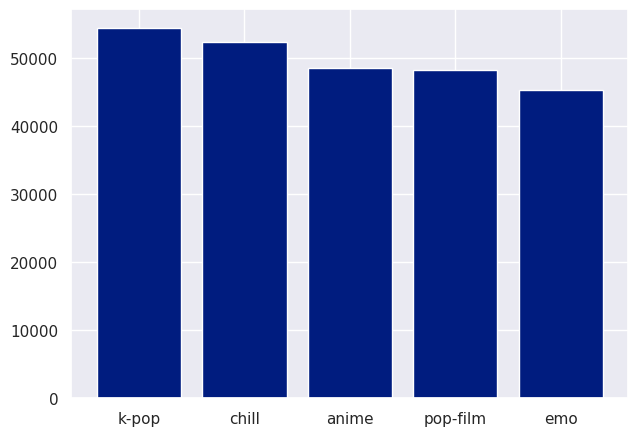

In [ ]:
plt.bar(generos_populares.index, generos_populares)

In [ ]:
dados_numericos = dados_limpos.select_dtypes(include=['number'])

# Verificar as primeiras linhas do DataFrame numérico
print(dados_numericos.head())

   Unnamed: 0  popularity  duration_ms  danceability  energy  key  loudness  \
0           0          73       230666         0.676  0.4610    1    -6.746   
1           1          55       149610         0.420  0.1660    1   -17.235   
2           2          57       210826         0.438  0.3590    0    -9.734   
3           3          71       201933         0.266  0.0596    0   -18.515   
4           4          82       198853         0.618  0.4430    2    -9.681   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     0       0.1430        0.0322          0.000001    0.3580    0.715   
1     1       0.0763        0.9240          0.000006    0.1010    0.267   
2     1       0.0557        0.2100          0.000000    0.1170    0.120   
3     1       0.0363        0.9050          0.000071    0.1320    0.143   
4     1       0.0526        0.4690          0.000000    0.0829    0.167   

     tempo  time_signature  
0   87.917               4  
1   77.489      

In [ ]:
dados_numericos.corr()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
Unnamed: 0,1.000000,0.036328,-0.029044,-0.025993,-0.061693,-0.009098,-0.043376,-0.006199,-0.086852,0.086952,-0.048577,0.048416,0.034995,-0.032262,-0.030159
popularity,0.036328,1.000000,-0.023157,0.064275,0.013725,0.003441,0.071674,-0.016238,-0.047086,-0.038828,-0.127477,-0.013857,-0.011508,0.007280,0.036898
duration_ms,-0.029044,-0.023157,1.000000,-0.064139,0.063258,0.011297,0.000360,-0.039378,-0.060751,-0.108478,0.117372,0.008109,-0.147018,0.026004,0.022608
danceability,-0.025993,0.064275,-0.064139,1.000000,0.143913,0.035116,0.271838,-0.062639,0.109519,-0.177040,-0.194750,-0.132237,0.492578,-0.021329,0.210043
energy,-0.061693,0.013725,0.063258,0.143913,1.000000,0.046335,0.758774,-0.075018,0.141332,-0.732569,-0.181038,0.188940,0.256317,0.258629,0.186534
key,-0.009098,0.003441,0.011297,0.035116,0.046335,1.000000,0.035903,-0.142090,0.017761,-0.045165,-0.005281,-0.002580,0.026253,0.008272,0.014800
loudness,-0.043376,0.071674,0.000360,0.271838,0.758774,0.035903,1.000000,-0.037111,0.055295,-0.582664,-0.434719,0.077238,0.289095,0.228660,0.193695
mode,-0.006199,-0.016238,-0.039378,-0.062639,-0.075018,-0.142090,-0.037111,1.000000,-0.040802,0.091038,-0.052588,0.016766,0.025583,-0.001895,-0.023900
speechiness,-0.086852,-0.047086,-0.060751,0.109519,0.141332,0.017761,0.055295,-0.040802,1.000000,0.005124,-0.099659,0.225100,0.032935,0.004033,-0.006198
acousticness,0.086952,-0.038828,-0.108478,-0.177040,-0.732569,-0.045165,-0.582664,0.091038,0.005124,1.000000,0.096072,-0.019073,-0.103781,-0.220252,-0.174057


In [ ]:
dados_limpos.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [ ]:
dados_limpos.duration_ms

,duration_ms
0,230666
1,149610
2,210826
3,201933
4,198853
...,...
113995,384999
113996,385000
113997,271466
113998,283893


Artistas Populares por Obra

In [ ]:
artistas_popularidade = dados_limpos[['artists', 'popularity']]
artistas_populares = artistas_popularidade.groupby("artists").mean().sort_values(by='popularity', ascending=False).reset_index()

#Trazendo somente os 5 primeiros
artistas_populares = artistas_populares.head()
artistas_populares

,artists,popularity
0,Sam Smith;Kim Petras,100.0
1,Bizarrap;Quevedo,99.0
2,Manuel Turizo,98.0
3,Bad Bunny;Chencho Corleone,97.0
4,Bad Bunny;Bomba Estéreo,95.0


Músicas mais longas

In [ ]:
long_songs = dados_limpos[["track_name", "duration_ms"]].sort_values(by="duration_ms", ascending=False)[:5]
long_songs

,track_name,duration_ms
73617,Unity (Voyage Mix) Pt. 1,5237295
10935,Crossing Wires 002 - Continuous DJ Mix,4789026
24348,The Lab 03 - Continuous DJ Mix Part 1,4730302
73840,Amnesia Ibiza Underground 10 DJ Mix,4563897
13344,House of Om - Mark Farina - Continuous Mix,4447520


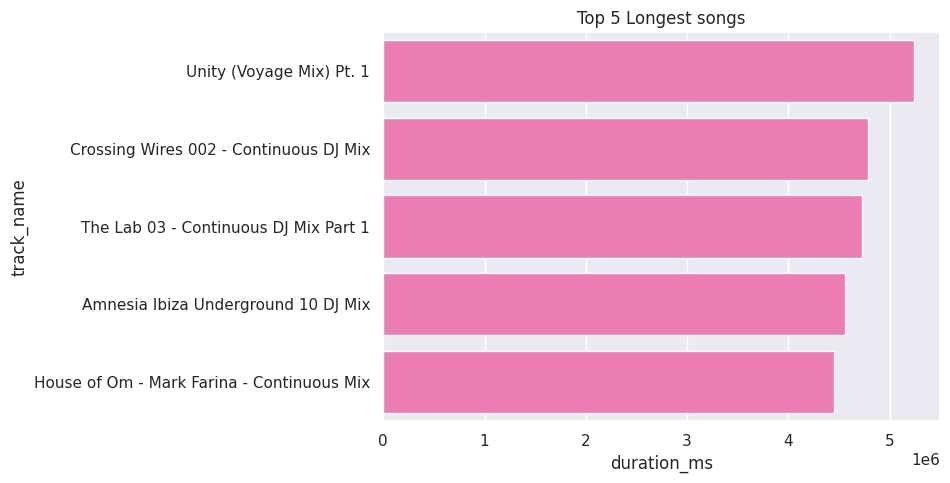

In [ ]:
sns.barplot(x="duration_ms", y="track_name", data= long_songs, color = 'hotpink')
plt.title("Top 5 Longest songs")
plt.show()

In [ ]:
#Top 5 most danceable songs

danceable = dados_limpos[["track_name", "artists", "danceability"]].sort_values(by="danceability", ascending=False)[:5]
danceable

,track_name,artists,danceability
111635,Sol Clap,Quantic,0.985
66576,Medicaid Baby,That Girl Lay Lay,0.984
24916,Inspiration,Delano Smith,0.983
73374,Daily Routines,Oliver Schories,0.982
66793,"Featuring Mixx Master Lee, Red Rum & J. Smoov ...",Mixx Master Lee,0.981


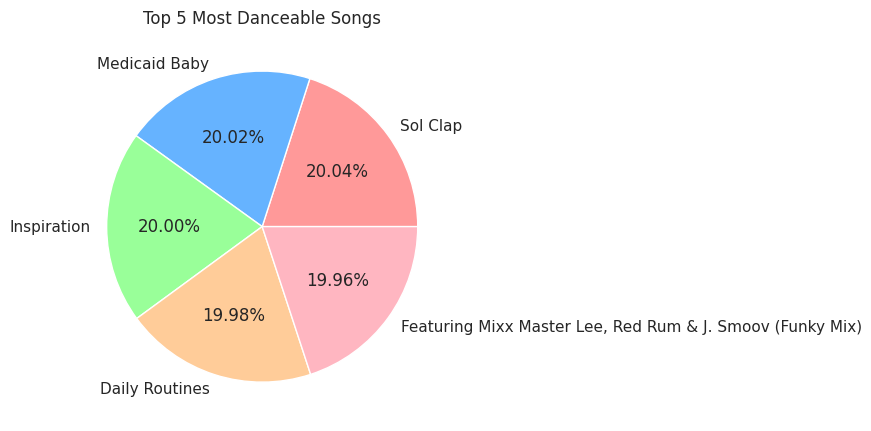

In [ ]:
#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#ffb6c1']

plt.pie(x="danceability", data=danceable, autopct='%1.2f%%', labels=danceable.track_name, colors = colors)
plt.title("Top 5 Most Danceable Songs")
plt.show()

In [ ]:
dados_musicas = dados_limpos

In [ ]:
# Criando classes de popularidade
dados_musicas[dados_musicas["popularity"] >=80]

conditionlist = [
    (dados_musicas['popularity'] >= 80) ,
    (dados_musicas['popularity'] <80)]

choicelist = [1,0]
dados_musicas['pop_classe'] = np.select(conditionlist, choicelist, default='Not Specified')
dados_musicas['pop_classe'] = dados_musicas['pop_classe'].astype(int)

In [ ]:
dados_musicas = dados_musicas.dropna() #removendo valores nulos

In [ ]:
dados_musicas.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'pop_classe'],
      dtype='object')

In [ ]:
dados_musicas = dados_musicas.drop(columns=['popularity'])

In [ ]:
dados_musicas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89740 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        89740 non-null  int64  
 1   track_id          89740 non-null  object 
 2   artists           89740 non-null  object 
 3   album_name        89740 non-null  object 
 4   track_name        89740 non-null  object 
 5   duration_ms       89740 non-null  int64  
 6   explicit          89740 non-null  bool   
 7   danceability      89740 non-null  float64
 8   energy            89740 non-null  float64
 9   key               89740 non-null  int64  
 10  loudness          89740 non-null  float64
 11  mode              89740 non-null  int64  
 12  speechiness       89740 non-null  float64
 13  acousticness      89740 non-null  float64
 14  instrumentalness  89740 non-null  float64
 15  liveness          89740 non-null  float64
 16  valence           89740 non-null  float64
 1

In [ ]:
#Mantendo somente colunas quantitativas e que são importantes para o modelo

df_quantitative = dados_musicas
cols_to_drop = []
for column in dados_musicas:
    if dados_musicas[column].dtype == 'object':
        cols_to_drop.append(column)
df_quantitative = dados_musicas.drop(columns=cols_to_drop)

print(f"Tamanho do dataset que vamos trabalhar: {df_quantitative.shape}")

Tamanho do dataset que vamos trabalhar: (89740, 16)


In [ ]:
df_quantitative.head()

,Unnamed: 0,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,pop_classe
0,0,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0
1,1,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0
2,2,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0
3,3,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0
4,4,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,1


In [ ]:
df_quantitative = df_quantitative.drop(columns=['explicit'])
df_quantitative.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89740 entries, 0 to 113999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        89740 non-null  int64  
 1   duration_ms       89740 non-null  int64  
 2   danceability      89740 non-null  float64
 3   energy            89740 non-null  float64
 4   key               89740 non-null  int64  
 5   loudness          89740 non-null  float64
 6   mode              89740 non-null  int64  
 7   speechiness       89740 non-null  float64
 8   acousticness      89740 non-null  float64
 9   instrumentalness  89740 non-null  float64
 10  liveness          89740 non-null  float64
 11  valence           89740 non-null  float64
 12  tempo             89740 non-null  float64
 13  time_signature    89740 non-null  int64  
 14  pop_classe        89740 non-null  int64  
dtypes: float64(9), int64(6)
memory usage: 11.0 MB


In [ ]:
df_quantitative.head()

,Unnamed: 0,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,pop_classe
0,0,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0
1,1,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0
2,2,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0
3,3,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0
4,4,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,1


In [ ]:
# Normalizando os dados, deixando na mesma escala
df_quantitative_nm=(df_quantitative-df_quantitative.min())/(df_quantitative.max()-df_quantitative.min())

In [ ]:
df_quantitative_nm.head()

,Unnamed: 0,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,pop_classe
0,0.000000,0.042473,0.686294,0.4610,0.090909,0.791392,0.0,0.148187,0.032329,0.000001,0.3580,0.718593,0.361245,0.8,0.0
1,0.000009,0.026971,0.426396,0.1660,0.090909,0.597377,1.0,0.079067,0.927711,0.000006,0.1010,0.268342,0.318397,0.8,0.0
2,0.000018,0.038679,0.444670,0.3590,0.000000,0.736123,1.0,0.057720,0.210843,0.000000,0.1170,0.120603,0.313643,0.8,0.0
3,0.000026,0.036978,0.270051,0.0596,0.000000,0.573701,1.0,0.037617,0.908635,0.000071,0.1320,0.143719,0.746758,0.6,0.0
4,0.000035,0.036389,0.627411,0.4430,0.181818,0.737103,1.0,0.054508,0.470884,0.000000,0.0829,0.167839,0.492863,0.8,1.0


In [ ]:
# Separando os dados para treino e teste
df_train, df_test = train_test_split(df_quantitative_nm, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
# visualizando as proporções da variável alvo
df_train.pop_classe.value_counts(normalize=True)

,proportion
pop_classe,
0.0,0.99284
1.0,0.00716


In [ ]:
# dividindo X e y
X = df_train.drop('pop_classe', axis=1)
y = df_train.pop_classe

# separando os dados mantendo a porcentagem de amostras em cada classe
StratifKfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# looping para separar os dados em treino e validação
for train_index, val_index in StratifKfold.split(X, y):

    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

In [ ]:
# checando as proporções da classe 1 na divisão
print(f'Dimensões: {X_train.shape, X_val.shape, y_train.shape, y_val.shape}\n')
print(f"Proporção do df_train para classe=1: {round(len(df_train[df_train.pop_classe==1]) / df_train.shape[0], 4)}\n")
print(f"Proporção de X_train para classe=1:  {round(len(y_train[y_train==1]) / X_train.shape[0], 4)}")
print(f"Proporção de X_val para classe=1:    {round(len(y_val[y_val==1]) / X_val.shape[0], 4)}")

Dimensões: ((57434, 14), (14358, 14), (57434,), (14358,))

Proporção do df_train para classe=1: 0.0072

Proporção de X_train para classe=1:  0.0072
Proporção de X_val para classe=1:    0.0072


In [ ]:
# Instanciando o modelo
logReg = LogisticRegression()

# Treinando o modelo
logReg.fit(X_train, y_train)

# Prevendo nos dados de treino
y_pred_base_train = logReg.predict(X_train)

# Prevendo nos dados de validação
y_pred_base_val = logReg.predict(X_val)

In [ ]:
logReg.coef_.tolist()[0]

[-0.2493309118388811,
 -0.7587314548545253,
 2.7697479074105495,
 -1.341545765417932,
 -0.280238003720517,
 4.309050211394044,
 -0.043057147310274144,
 -0.5498736441595192,
 -1.7190819236071186,
 -3.177438509034982,
 -1.0501510349952323,
 -0.5853976035636052,
 -0.21493391347839166,
 -0.04529680424514241]

In [ ]:
df_coef = df_quantitative_nm.drop(columns='pop_classe')
df_coef.columns

Index(['Unnamed: 0', 'duration_ms', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [ ]:
data = {
    "Features": df_coef.columns,
    "Coef": logReg.coef_.tolist()[0]
}

df = pd.DataFrame(data)
df

,Features,Coef
0,Unnamed: 0,-0.249331
1,duration_ms,-0.758731
2,danceability,2.769748
3,energy,-1.341546
4,key,-0.280238
5,loudness,4.309050
6,mode,-0.043057
7,speechiness,-0.549874
8,acousticness,-1.719082
9,instrumentalness,-3.177439


In [ ]:
print('Nos dados de TREINO:')

print('---' * 20)
print('Modelo:    Regressão Logística (baseline)\n')
print(f"accuracy:  {accuracy_score(y_train, y_pred_base_train)}")
print(f"precision: {precision_score(y_train, y_pred_base_train)}")
print(f"recall:    {recall_score(y_train, y_pred_base_train)}")
print(f"f1:        {f1_score(y_train, y_pred_base_train)}")
print()
print('---' * 20)
print('---' * 20)
print()
print('Nos dados de VALIDAÇÃO:')
print('---' * 20)
print('Modelo:    Regressão Logística (baseline)\n')
print(f"accuracy:  {accuracy_score(y_val, y_pred_base_val)}")
print(f"precision: {precision_score(y_val, y_pred_base_val)}")
print(f"recall:    {recall_score(y_val, y_pred_base_val)}")
print(f"f1:        {f1_score(y_val, y_pred_base_val)}")
print('---' * 20)

Nos dados de TREINO:
------------------------------------------------------------
Modelo:    Regressão Logística (baseline)

accuracy:  0.9928439600236794
precision: 0.0
recall:    0.0
f1:        0.0

------------------------------------------------------------
------------------------------------------------------------

Nos dados de VALIDAÇÃO:
------------------------------------------------------------
Modelo:    Regressão Logística (baseline)

accuracy:  0.9928262989274272
precision: 0.0
recall:    0.0
f1:        0.0
------------------------------------------------------------


In [ ]:
# Dicionário dos classificadores
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [ ]:
# instanciando o método
undersample = NearMiss()

# transformando o conjunto de dados
X_under, y_under = undersample.fit_resample(X_train, y_train)

# resumindo a distribuição da nova classe
counter = Counter(y_under)
print(counter)

Counter({0.0: 411, 1.0: 411})


In [ ]:
for nome, model in classifiers.items():

    model.fit(X_under, y_under)
    y_pred = model.predict(X_val)

    print(f'Modelo:    {nome}\n')
    print(f"accuracy:  {accuracy_score(y_val, y_pred)}")
    print(f"precision: {precision_score(y_val, y_pred)}")
    print(f"recall:    {recall_score(y_val, y_pred)}")
    print(f"f1:        {f1_score(y_val, y_pred)}")
    print('---' * 20)
    print('---' * 20)

Modelo:    LogisiticRegression

accuracy:  0.17732274690068256
precision: 0.0056573503335303555
recall:    0.6504854368932039
f1:        0.011217143813828897
------------------------------------------------------------
------------------------------------------------------------
Modelo:    KNearest

accuracy:  0.26208385569020753
precision: 0.006305288913984566
recall:    0.6504854368932039
f1:        0.012489514400223693
------------------------------------------------------------
------------------------------------------------------------
Modelo:    DecisionTreeClassifier

accuracy:  0.16959186516227887
precision: 0.007171447631754503
recall:    0.8349514563106796
f1:        0.014220752377015297
------------------------------------------------------------
------------------------------------------------------------
Modelo:    Random Forest

accuracy:  0.07521938988717092
precision: 0.0069605568445475635
recall:    0.9029126213592233
f1:        0.013814616755793227
------------------

In [ ]:
# instanciando o método
oversample = RandomOverSampler(sampling_strategy='minority')

# transformando o conjunto de dados
X_over, y_over = oversample.fit_resample(X_train, y_train)

# resumindo a distribuição da nova classe
counter = Counter(y_over)
print(counter)

Counter({0.0: 57023, 1.0: 57023})


In [ ]:
for nome, model in classifiers.items():

    model.fit(X_over, y_over)
    y_pred = model.predict(X_val)

    print(f'Modelo:    {nome}\n')
    print(f"accuracy:  {accuracy_score(y_val, y_pred)}")
    print(f"precision: {precision_score(y_val, y_pred)}")
    print(f"recall:    {recall_score(y_val, y_pred)}")
    print(f"f1:        {f1_score(y_val, y_pred)}")
    print('---' * 20)
    print('---' * 20)


Modelo:    LogisiticRegression

accuracy:  0.6388076333751219
precision: 0.01451766953199618
recall:    0.7378640776699029
f1:        0.028475084301236415
------------------------------------------------------------
------------------------------------------------------------
Modelo:    KNearest

accuracy:  0.9729767377072016
precision: 0.026578073089700997
recall:    0.07766990291262135
f1:        0.039603960396039604
------------------------------------------------------------
------------------------------------------------------------
Modelo:    DecisionTreeClassifier

accuracy:  0.9876723777684915
precision: 0.13
recall:    0.1262135922330097
f1:        0.12807881773399016
------------------------------------------------------------
------------------------------------------------------------
Modelo:    Random Forest

accuracy:  0.9922691182615964
precision: 0.21428571428571427
recall:    0.02912621359223301
f1:        0.05128205128205128
------------------------------------------

In [ ]:
# instanciando o método
oversample_smote = SMOTE(sampling_strategy='minority')

# transformando o conjunto de dados
X_smote, y_smote = oversample_smote.fit_resample(X_train, y_train)

# resumindo a distribuição da nova classe
counter = Counter(y_smote)
print(counter)


Counter({0.0: 57023, 1.0: 57023})


In [ ]:
for nome, model in classifiers.items():

    model.fit(X_smote, y_smote)
    y_pred = model.predict(X_val)

    print(f'Modelo:    {nome}\n')
    print(f"accuracy:  {accuracy_score(y_val, y_pred)}")
    print(f"precision: {precision_score(y_val, y_pred)}")
    print(f"recall:    {recall_score(y_val, y_pred)}")
    print(f"f1:        {f1_score(y_val, y_pred)}")
    print('---' * 20)
    print('---' * 20)

Modelo:    LogisiticRegression

accuracy:  0.6724474160746622
precision: 0.015381373788453435
recall:    0.7087378640776699
f1:        0.030109300886780783
------------------------------------------------------------
------------------------------------------------------------
Modelo:    KNearest

accuracy:  0.9210196406184705
precision: 0.015051740357478834
recall:    0.1553398058252427
f1:        0.027444253859348202
------------------------------------------------------------
------------------------------------------------------------
Modelo:    DecisionTreeClassifier

accuracy:  0.9533361192366625
precision: 0.029850746268656716
recall:    0.17475728155339806
f1:        0.05099150141643059
------------------------------------------------------------
------------------------------------------------------------
Modelo:    Random Forest

accuracy:  0.9864883688536008
precision: 0.09009009009009009
recall:    0.0970873786407767
f1:        0.09345794392523366
--------------------------

In [ ]:
# transformando o conjunto de dados
over = RandomOverSampler(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

# instanciando um pipeline com os dois métodos
pipeline = Pipeline(steps=[('o', over), ('u', under)])

# transformando o conjunto de dados
X_under_over, y_under_over = pipeline.fit_resample(X_train, y_train)

# resumindo a distribuição da nova classe
counter = Counter(y_under_over)
print(counter)

Counter({0.0: 11404, 1.0: 5702})


In [ ]:
for nome, model in classifiers.items():

    model.fit(X_under_over, y_under_over)
    y_pred = model.predict(X_val)

    print(f'Modelo:    {nome}\n')
    print(f"accuracy:  {accuracy_score(y_val, y_pred)}")
    print(f"precision: {precision_score(y_val, y_pred)}")
    print(f"recall:    {recall_score(y_val, y_pred)}")
    print(f"f1:        {f1_score(y_val, y_pred)}")
    print('---' * 20)
    print('---' * 20)

Modelo:    LogisiticRegression

accuracy:  0.8658587547012119
precision: 0.021019442984760904
recall:    0.3883495145631068
f1:        0.03988035892323031
------------------------------------------------------------
------------------------------------------------------------
Modelo:    KNearest

accuracy:  0.8972698147374286
precision: 0.014164305949008499
recall:    0.1941747572815534
f1:        0.026402640264026403
------------------------------------------------------------
------------------------------------------------------------
Modelo:    DecisionTreeClassifier

accuracy:  0.9660119793843154
precision: 0.05542725173210162
recall:    0.23300970873786409
f1:        0.08955223880597014
------------------------------------------------------------
------------------------------------------------------------
Modelo:    Random Forest

accuracy:  0.9894135673492129
precision: 0.07017543859649122
recall:    0.038834951456310676
f1:        0.049999999999999996
-------------------------

In [ ]:
# transformando os dados
X_train_array = X_train.values
X_val_array = X_val.values
y_train_array = y_train.values
y_val_array = y_val.values

In [ ]:
#HIPERPARÂMETROS PARA RANDOM FOREST

# número de árvores
n_estimators = [3,5,10,100]

# número de features para considerar em cada split
max_features = [3,4,5,6,None]

# número máximo de níveis da árvore
max_depth = [3,4,5,6,None]

# pesos para cada classe
class_weight = ['balanced',None]

# colocando os parametros definidos em um dicionário
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'class_weight': class_weight}


In [ ]:
# exibindo os parâmetros
pprint(random_grid)

{'class_weight': ['balanced', None],
 'max_depth': [3, 4, 5, 6, None],
 'max_features': [3, 4, 5, 6, None],
 'n_estimators': [3, 5, 10, 100]}


In [ ]:
# definindo listas vazias para receber os resultados da validação cruzada
accuracy_lst_rf = []
precision_lst_rf = []
recall_lst_rf = []
f1_lst_rf = []
auc_lst_rf = []


# instanciando o RandomizedSearchCV para validação cruzada com o grid de parametros
rf_grid = RandomizedSearchCV(RandomForestClassifier(), random_grid, random_state=42)

# iniciando o tempo e contador para o loop
start = time.time()
count = 0

# looping para a validação cruzada
for train, test in StratifKfold.split(X_train_array, y_train_array):

    # instanciando o pipeline com técnica de reamostragem
    pipeline_rf = imbalanced_make_pipeline(RandomOverSampler(sampling_strategy='minority'), rf_grid)

    # executando o pipeline para treinar o modelo
    model_rf = pipeline_rf.fit(X_train_array[train], y_train_array[train])

    # identificando os melhores parâmetros no treinamento
    best_est_rf = rf_grid.best_estimator_

    # realizando as previsões com o resultado do treinamento
    prediction_rf = best_est_rf.predict(X_train_array[test])

    # armazenando os resultados
    accuracy_lst_rf.append(pipeline_rf.score(X_train_array[test], y_train_array[test]))
    precision_lst_rf.append(precision_score(y_train_array[test], prediction_rf))
    recall_lst_rf.append(recall_score(y_train_array[test], prediction_rf))
    f1_lst_rf.append(f1_score(y_train_array[test], prediction_rf))
    auc_lst_rf.append(roc_auc_score(y_train_array[test], prediction_rf))

    # identificando em qual loop está
    count = count + 1
    print(f"kfold nº: {count}")

    # medindo o tempo de cada loop
    intervalo = time.time()
    print(f"tempo intermediário: {(intervalo - start)/60:.1f} minutos")
    print()

print('---' * 20)
print(f"melhores estimadores para RF: {rf_grid.best_params_}")

# imprimindo a média dos resultados da validação cruzada
print('---' * 20)
print('Resultados')
print(f"accuracy:  {np.mean(accuracy_lst_rf)}")
print(f"precision: {np.mean(precision_lst_rf)}")
print(f"recall:    {np.mean(recall_lst_rf)}")
print(f"f1:        {np.mean(f1_lst_rf)}")
print(f"AUC:       {np.mean(auc_lst_rf)}")
print('---' * 20)

# imprimindo o tempo total da validação cruzada
end = time.time()
print(f"Tempo do loop para validação cruzada: {(end - start)/60:.1f} minutos")


kfold nº: 1
tempo intermediário: 5.5 minutos

kfold nº: 2
tempo intermediário: 11.0 minutos

kfold nº: 3
tempo intermediário: 16.6 minutos

kfold nº: 4
tempo intermediário: 22.9 minutos



KeyboardInterrupt: 

In [ ]:
# criando uma função para plotar o gráfico
def draw_cv_roc_curve(classifier, cv, X, y, title='ROC Curve'):
    # definindo algumas listas vazias para receber o resultado
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    # definindo o contador
    i = 0

    # loop ara validação cruzada
    for train, test in cv.split(X, y):

        # executando a função e armazenando as probabilidade dos resultados
        probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])

        # computando a curva ROC e AUC
        fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)

        # plotando a curva ROC da validação cruzada em individualmente
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1

    # plotando a linha diagonal como referência da taxa de 50/50
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)

    # calculando as médias e desvio padrão
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)

    # plotando curva ROC com a média dos resultados
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f
 %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'
 1 std. dev.')

    # customizando o gráfico
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(title)
    plt.legend(loc="lower right")

    # exibindo o gráfico
    plt.show()

# executando função e plotando a Curva ROC AUC
draw_cv_roc_curve(best_est_rf, StratifKfold, X_train, y_train, title='ROC Curve')

In [ ]:
# separando novamente os dados
X_all = df_train.drop('pop_classe', axis=1)
y_all = df_train.pop_classe

# instanciando o modelo final com os parametros encontrados na validação cruzada
final_model = rf_grid.best_estimator_

# definindo o pipeline para reamostragem oversampling e o modelo final
pipeline = imbalanced_make_pipeline(RandomOverSampler(sampling_strategy='minority'), final_model)

# treinando o modelo com os parametros ajustados com todos os dados
model = pipeline.fit(X_all, y_all)

In [ ]:
model.steps[1]

In [ ]:
lista = model.steps[1][1].feature_importances_

In [ ]:
print(lista.tolist())

In [ ]:
# lista de nomes
nomes = df_quantitative_nm.columns

plt.barh(df_quantitative_nm.drop(columns=['pop_classe']).columns.tolist(), lista.tolist())

plt.show()

In [ ]:
##SUGESTÃO DE REMOÇÃO DE CORRELAÇÃO NA ETAPA DE PRÉ-PROCESSAMENTO

'''
Função que analisa a correlação entre as variáveis do banco de dados, cria uma
máscara para remover os dados espelhados e retorna os dados sem as variáveis
com correlação maior que o valor de corte 0.95.
'''

def remove_corr_var(dados, valor_corte = 0.95):

  matriz_corr = dados.iloc[:,4:-2].corr().abs()
  matriz_superior = matriz_corr.where(np.triu(np.ones(matriz_corr.shape), k=1).astype(np.bool))
  excluir = [coluna for coluna in matriz_superior.columns if any(matriz_superior[coluna]> valor_corte)]

  return dados.drop(excluir, axis=1)

In [ ]:
# separando os dados de teste
X_test = df_test.drop('pop_classe', axis=1)
y_test = df_test.pop_classe

# realizando as predições nos dados de teste
y_pred_test = model.predict(X_test)

# imprimindo os resultados
print(f"accuracy:  {accuracy_score(y_test, y_pred_test)}")
print(f"precision: {precision_score(y_test, y_pred_test)}")
print(f"recall:    {recall_score(y_test, y_pred_test)}")
print(f"f1:        {f1_score(y_test, y_pred_test)}")

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap=plt.cm.copper, fmt='g', cbar=False)
plt.title("Matriz de Confusão", fontsize=16, fontweight='bold')
plt.show()

In [ ]:
pd.DataFrame(index=['Baseline', 'Validação', 'Teste'],
             data = {"accuracy": [accuracy_score(y_val, y_pred_base_val), np.mean(accuracy_lst_rf), accuracy_score(y_test, y_pred_test)],
                     "precision": [precision_score(y_val, y_pred_base_val), np.mean(precision_lst_rf), precision_score(y_test, y_pred_test)],
                     "recall": [recall_score(y_val, y_pred_base_val), np.mean(recall_lst_rf), recall_score(y_test, y_pred_test)],
                     "f1": [f1_score(y_val, y_pred_base_val), np.mean(f1_lst_rf), f1_score(y_test, y_pred_test)]}
            )

In [ ]:
# antes de executar, deve ser criada a pasta modelo_versao1
# salvando o modelo treinado no diretório atual
pkl_filename_model = "/RandomForestModel.pkl"
with open(pkl_filename_model, 'wb') as file:
    pickle.dump(model, file)

In [ ]:
# armazenando as previsões no dataframe de teste
df_test['Predicted'] = y_pred_test

# comparando com real com o previsto no dataframe
df_test['Correct?'] = np.where(df_test['pop_classe'] == df_test['Predicted'], 'Yes', 'No')

In [ ]:
df_test.head()

In [ ]:
df_test[df_test['pop_classe'] == 1.0]